Let’s explore one of the simplest datasets, The IRIS Dataset which basically is a data about three species of a Flower type in form of its :

Sepal length, 
sepal width, 
petal length, and 
petal width. 

The data set consists of 50 samples from each of the three species of Iris
(Iris setosa, Iris virginica, and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

Our objective is to classify a new flower as belonging to one of the 3 classes given the 4 features.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris=pd.read_csv("iris.csv");

In [3]:
# How many data points and featuer:

print(iris.shape)

(150, 5)


In [4]:
# what are the column name in data set
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Exploring Data

In [5]:
# How many data points for each class are present
# How many flowers for each species are present

iris["species"].value_counts()


setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

# Here Iris is a balanced data set because each species has number same records like Setosa,virginca and versicolor each has 50. If the classes has number of data points is different then it wil call as unbalanced data set

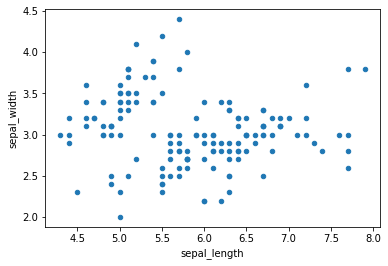

In [12]:
# let us plot the diagram 2D by using Pandas object and matplot lib and show 2d graph
# 2D scatter PLOT

iris.plot(kind='scatter',x='sepal_length',y='sepal_width');
plt.show()

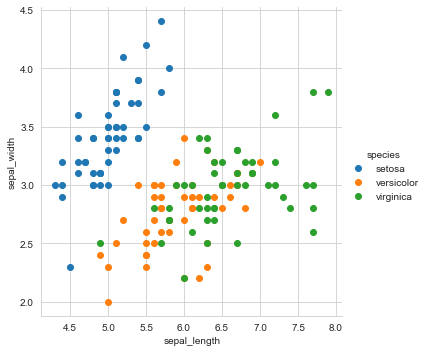

In [29]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species",height=5)\
.map(plt.scatter,"sepal_length","sepal_width")\
.add_legend()
            
plt.show()


In [ ]:
# From the following map obervation we found the blue setosa can be easily separated from orange
#versicolor and virginica by a line but versicolor and virginica still complex as they are over
#lapping each on other


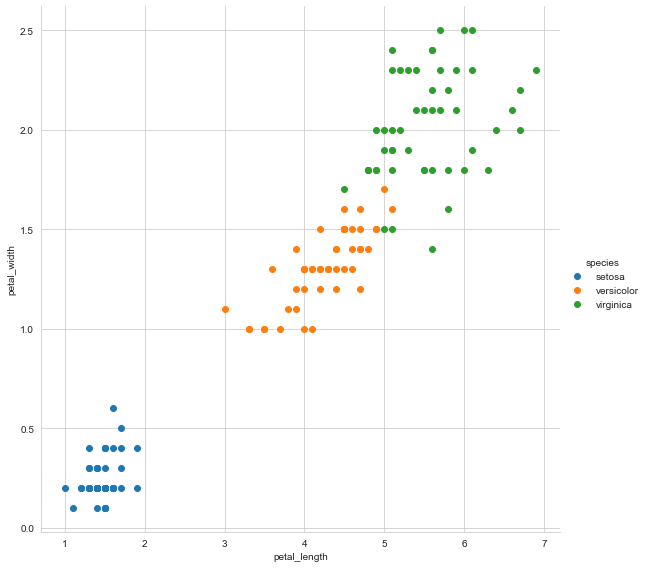

In [32]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species",height=8)\
.map(plt.scatter,"petal_length","petal_width")\
.add_legend()
            
plt.show()

In [ ]:
# here we found very clear information about petal length and width and 3 species we can easily 
# separated


In [44]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


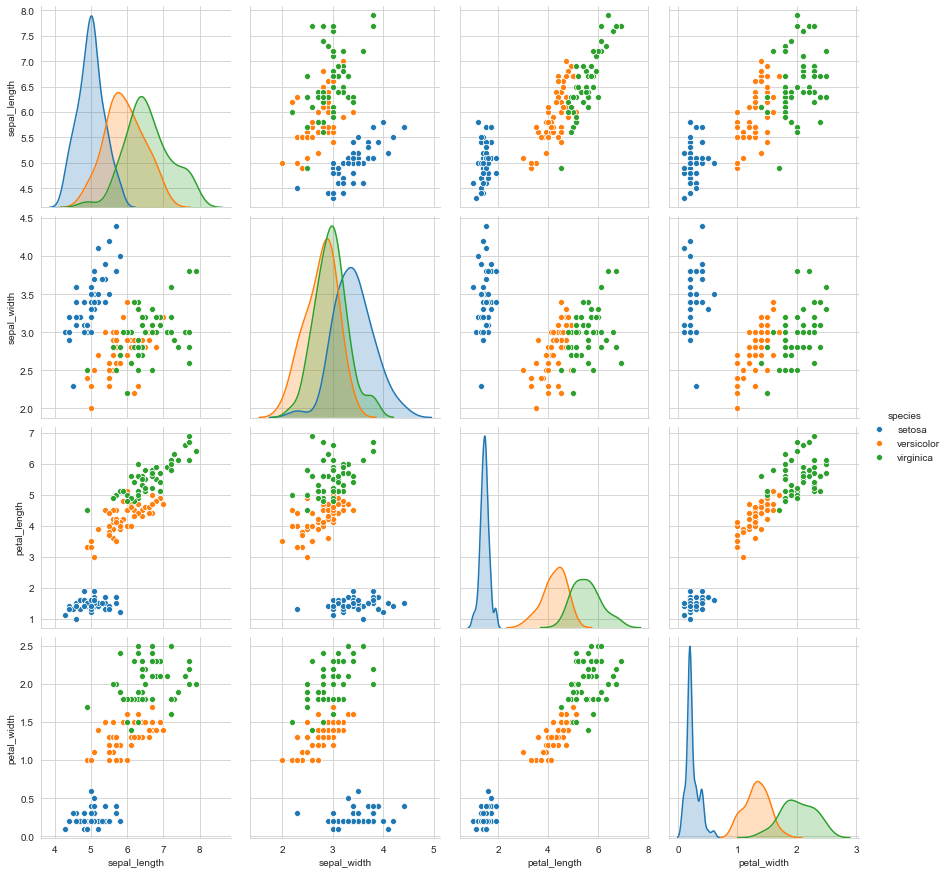

In [45]:
#Okay now lets check 2D with pair plot
sns.set_style("whitegrid")
sns.pairplot(iris,hue='species',height=3,kind='scatter')


In [ ]:
# So here if we observe the pair plots then we can say petal_length and 
# petal_width are the most essential features to 
# identify various flower types.
# While Setosa can be easily linearly separable, Virginica and Versicolor have some overlap. 
# which we can separate them by some condition

In [56]:
# Separating sepceis as per their location and fetch 50 records per species

iris_setosa=iris.loc[iris['species']=='setosa']
iris_virginica=iris.loc[iris['species']=='virginica']
iris_versicolor=iris.loc[iris['species']=='versicolor']

Text(0.5, 0, 'Petal Length')

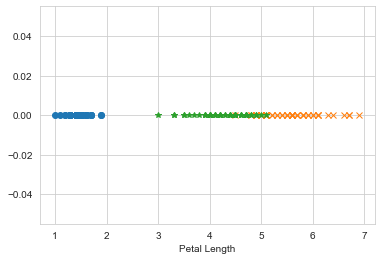

In [76]:
#1D Scatter Plot, Histogram, PDF & CDF

plt.plot(iris_setosa["petal_length"],np.zeros_like(iris_setosa['petal_length']),'o')
plt.plot(iris_virginica["petal_length"],np.zeros_like(iris_virginica['petal_length']),'x')
plt.plot(iris_versicolor["petal_length"],np.zeros_like(iris_versicolor['petal_length']),'*')
plt.xlabel('Petal Length')


# It is very hard to make sense as points are overlapping lot. so for better visualization we will use seaborn Probability desnity function cum histogram.

#Histogram : Histogram is the plot representing the frequency counts of each data window of the feature for which the plot is drawn (Bar shapes in the graph).

#PDF : Probability Density Function is basically a smoothed histogram. Every point on the PDF represents the probability for that particular value in the data (bell shaped curve in the graph). PDF gets formatted using Kernel Density Estimation. For each value of the point on x-axis, y-axis value represents its probabily of occuring in the dataset. More the y value more of that value exists in the dataset.

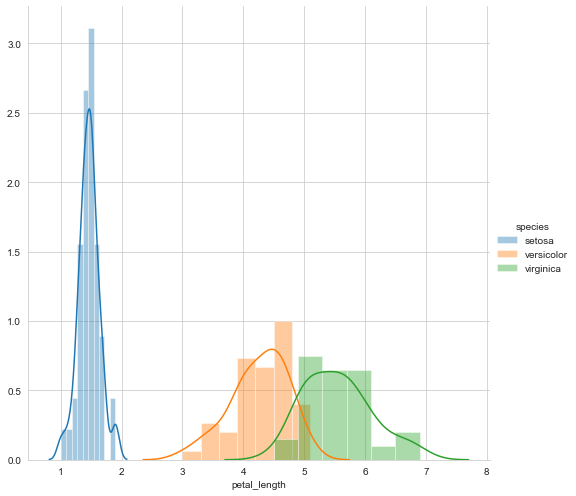

In [102]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species",height=7).map(sns.distplot,"petal_length")\
.add_legend()
         
plt.show() 


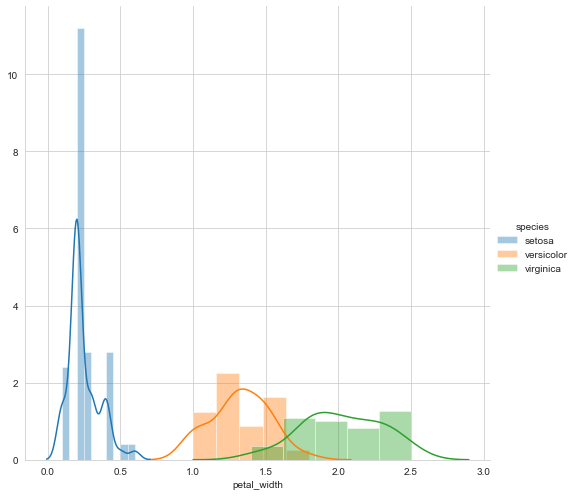

In [104]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species",height=7).map(sns.distplot,"petal_width")\
.add_legend()
         
plt.show() 

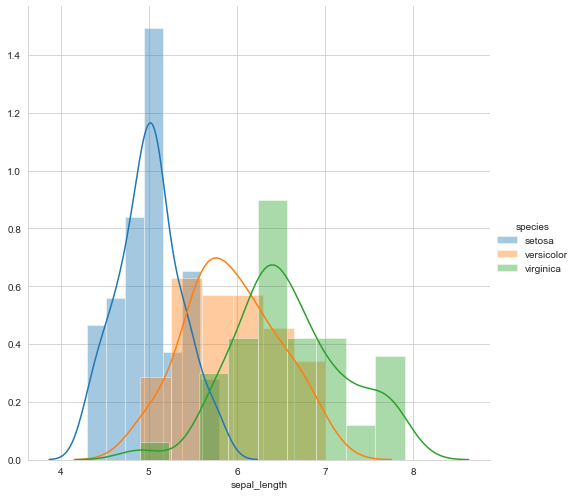

In [105]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species",height=7).map(sns.distplot,"sepal_length")\
.add_legend()
plt.show() 

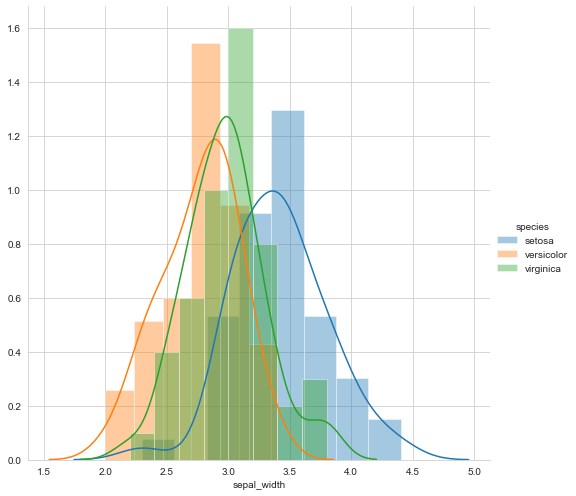

In [106]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species",height=7).map(sns.distplot,"sepal_width")\
.add_legend()
plt.show() 

In [112]:
counts,bin_ages=np.histogram(iris_setosa['petal_length'],bins=10,density = True)

In [116]:
counts

array([0.22222222, 0.22222222, 0.44444444, 1.55555556, 2.66666667,
       3.11111111, 1.55555556, 0.88888889, 0.        , 0.44444444])

In [117]:
bin_ages

array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ])


****PDF******

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]

****CDF******

[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


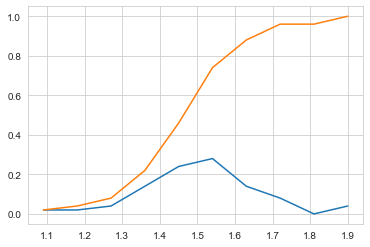

In [147]:
pdf=counts/sum(counts)
#pdf.sort()
print('\n****PDF******\n')
print (pdf)

#compute CDF
cdf=np.cumsum(pdf)
#cdf.sort()
print('\n****CDF******\n')
print(cdf)
plt.plot(bin_ages[1:],pdf)
plt.plot(bin_ages[1:],cdf)